In [ ]:
# Parcial II. Modelos Computacionales
# Claudia Coutiño Vásquez

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# Cargar archivos
df_illness = pd.read_csv("adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses.csv") # Este es el que sí ocupamos
df_illness.head() # Visualizar las primeras filas

# Estos no se utilizan:
# df_mi_prevalence = pd.read_csv("mental-illnesses-prevalence.csv") 
#df_mi_burden = pd.read_csv("burden-disease-from-each-mental-illness.csv")
#df_md_adpop = pd.read_csv("adult-population-covered-in-primary-data-on-the-prevalence-of-major-depression.csv")
#df_md_sym = pd.read_csv("anxiety-disorders-treatment-gap.csv")
#df_anx = pd.read_csv("depressive-symptoms-across-us-population.csv")
#df_countries = pd.read_csv("number-of-countries-with-primary-data-on-prevalence-of-mental-illnesses-in-the-global-burden-of-disease-study.csv")

,Entity,Code,Year,Major depression,Bipolar disorder,Eating disorders,Dysthymia,Schizophrenia,Anxiety disorders
0,Andean Latin America,NaN,2008,0.0,0.0,0.0,0.0,0,0.0
1,Asia Pacific,NaN,2008,80.8,3.8,23.1,1.0,71.6,93.1
2,Australasia,NaN,2008,100.0,100.0,16.4,100.0,85.1,100.0
3,Caribbean,NaN,2008,9.1,0.0,0.0,0.0,28.3,0.0
4,Central Asia,NaN,2008,0.0,0.0,0.0,0.0,0,0.0


In [82]:
# Crear una función llamada "df_ordered" que reciba un dataframe y un str y retorne un dataframe ordenado de mayor a 
# menor considerando la característica str
def df_ordered(df, col_name):
    if col_name in df.columns:
        return df.sort_values(by=col_name, ascending=False)
    else:
        return f"La columna '{col_name}' no existe en el dataframe."    

# Probar la función
df_ordered_result = df_ordered(df_illness, 'Anxiety disorders')
df_ordered_result.head()

,Entity,Code,Year,Major depression,Bipolar disorder,Eating disorders,Dysthymia,Schizophrenia,Anxiety disorders
2,Australasia,NaN,2008,100.0,100.0,16.4,100.0,85.1,100.0
12,North America,NaN,2008,100.0,89.8,89.8,90.2,89.8,93.4
1,Asia Pacific,NaN,2008,80.8,3.8,23.1,1.0,71.6,93.1
20,Western Europe,NaN,2008,73.6,19.0,57.3,7.5,12.6,81.8
17,Southern Sub-Saharan Africa,NaN,2008,0.1,0.0,0.0,0.1,<0.1,73.6


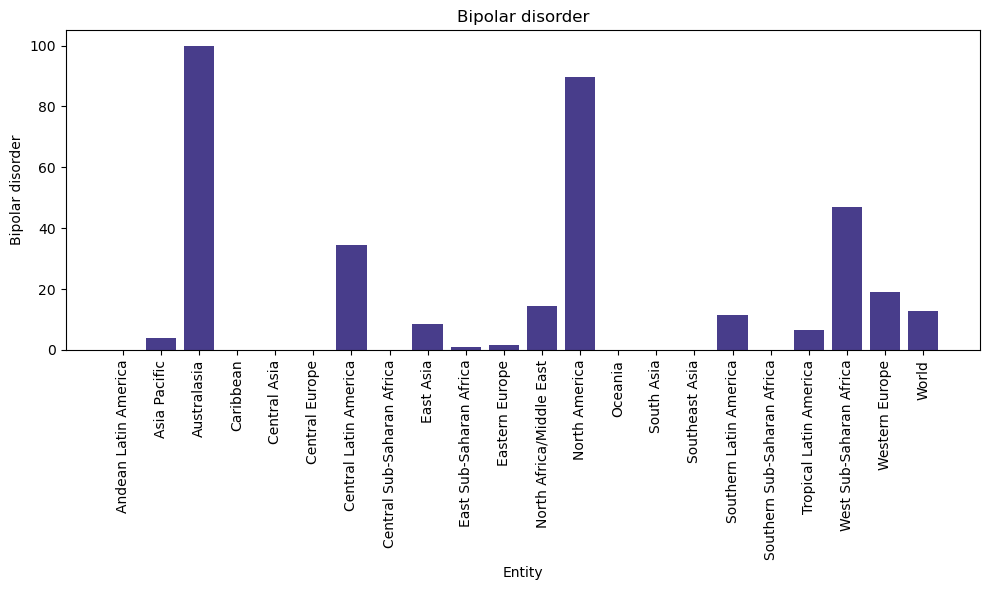

In [108]:
# Crear una función llamada "plot_bar" que reciba un dataframe y un str y haga el plot de barras de ese dataframe considerando 
# esa caracterísitca descrita por el string
def plot_bar(df, col_name):
    if col_name in df.columns:
        plt.figure(figsize=(10,6))
        plt.bar(df['Entity'], df[col_name], color='darkslateblue')
        plt.title(f'{col_name}')
        plt.xlabel('Entity')
        plt.ylabel(col_name)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

# Probar la función
plot_bar(df_illness, 'Bipolar disorder')

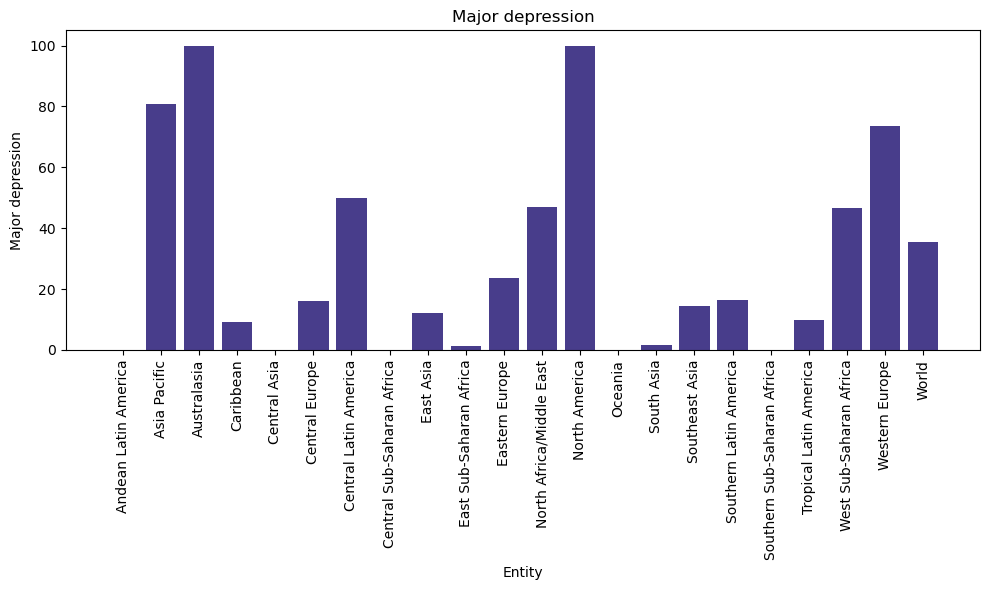

In [124]:
# Países con mayor depresión-> gráfica de barras mostrando el valor de depresión y la entidad (país)
plot_bar(df_illness, 'Major depression')

# Sumar el valor de DEPRESION a lo largo de los años para cada país
# Reemplazar valores no numéricos en la columna 'Major depression' por números
df_illness['Major depression'] = df_illness['Major depression'].replace("<0.1", 0.1).apply(pd.to_numeric, errors='coerce')

In [120]:
# Top 10 países con mayor depresión
depression_10 = depression.nlargest(10)
print('Top 10 paises con mayor depresión', depression_10)

Top 10 paises con mayor depresión Entity
Australasia                 100.0
North America               100.0
Asia Pacific                 80.8
Western Europe               73.6
Central Latin America        49.8
North Africa/Middle East     47.0
West Sub-Saharan Africa      46.6
World                        35.4
Eastern Europe               23.6
Southern Latin America       16.5
Name: Major depression, dtype: float64


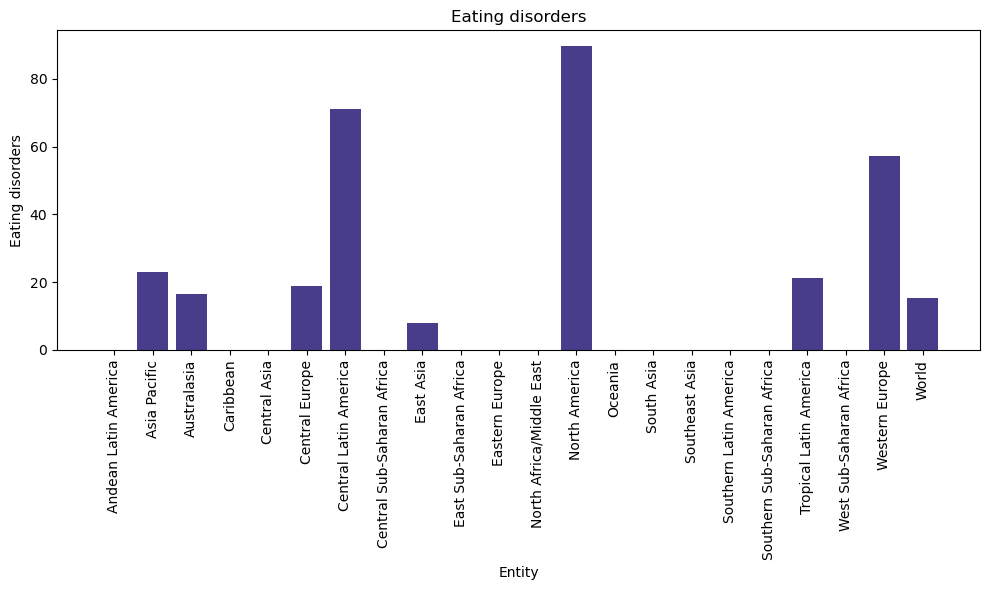

In [130]:
# Países con mayor desorden alimenticio-> gráfica de barras mostrando el valor de desorden alimenticio y la entidad (país)
plot_bar(df_illness, 'Eating disorders')

# Sumar el valor de DESORDEN ALIMENTICIO a lo largo de los años para cada país
# Reemplazar valores no numéricos en la columna 'Eating disorders' por números
df_illness['Eating disorders'] = df_illness['Eating disorders'].replace("<0.1", 0.1).apply(pd.to_numeric, errors='coerce')

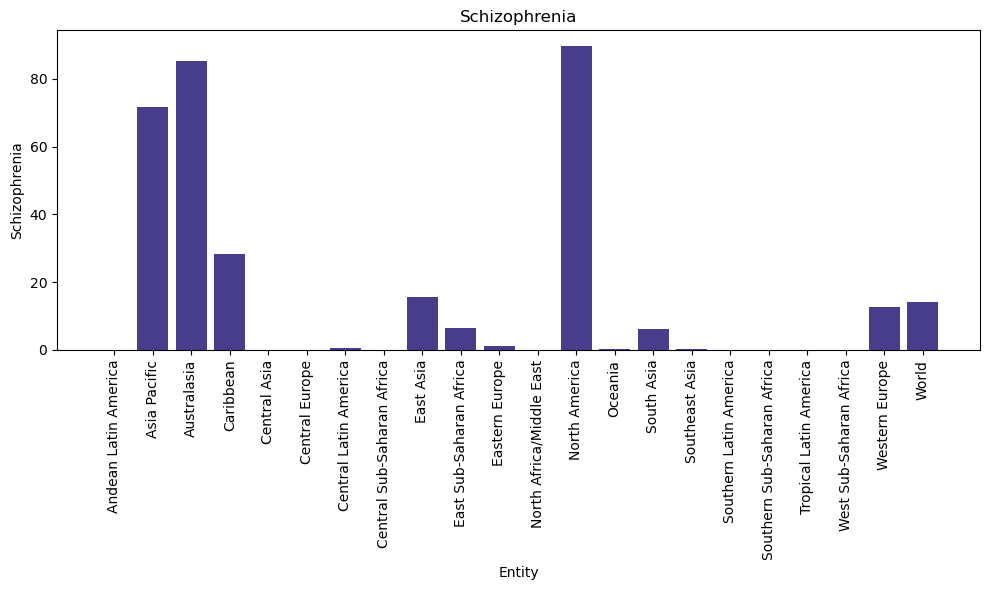

In [148]:
# Países con mayor esquizofrenia-> gráfica de barras mostrando el valor de esquizofrenia y la entidad (país)
plot_bar(df_illness, 'Schizophrenia')

# Sumar el valor de ESQUIZOFRENIA a lo largo de los años para cada país
# Reemplazar valores no numéricos en la columna 'Schizophrenia' por números
df_illness['Schizophrenia'] = df_illness['Schizophrenia'].replace("<0.1", 0.1).apply(pd.to_numeric, errors='coerce')

In [158]:
# Crear un data frame con los valores por país de ["Entity Code", "Year", "Schizophrenia disorders", "Depressive disorders", 
# "Anxiety disorders", "Bipolar disorders", "Eating disorders"]
columnas = ["Entity", "Code", "Year", "Schizophrenia", "Major depression", "Anxiety disorders", "Bipolar disorder", "Eating disorders"]
df_selected = df_illness[columnas]
df_selected.head() # Mostrar los primeros datos

,Entity,Code,Year,Schizophrenia,Major depression,Anxiety disorders,Bipolar disorder,Eating disorders
0,Andean Latin America,NaN,2008,0.0,0.0,0.0,0.0,0.0
1,Asia Pacific,NaN,2008,71.6,80.8,93.1,3.8,23.1
2,Australasia,NaN,2008,85.1,100.0,100.0,100.0,16.4
3,Caribbean,NaN,2008,28.3,9.1,0.0,0.0,0.0
4,Central Asia,NaN,2008,0.0,0.0,0.0,0.0,0.0


In [156]:
# Estadísticos Descriptivos
df_selected.describe(include='all')

,Entity,Code,Year,Schizophrenia,Major depression,Anxiety disorders,Bipolar disorder,Eating disorders
count,22,1,22.0,22.000000,22.000000,22.000000,22.000000,22.000000
unique,22,1,NaN,NaN,NaN,NaN,NaN,NaN
top,Andean Latin America,OWID_WRL,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2008.0,15.127273,28.995455,34.181818,15.931818,14.577273
std,NaN,NaN,0.0,28.356627,33.230042,35.825870,28.352431,25.455918
min,NaN,NaN,2008.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,2008.0,0.000000,1.400000,0.925000,0.000000,0.000000
50%,NaN,NaN,2008.0,0.550000,15.250000,23.900000,2.750000,0.000000
75%,NaN,NaN,2008.0,13.800000,46.900000,63.925000,14.100000,18.200000


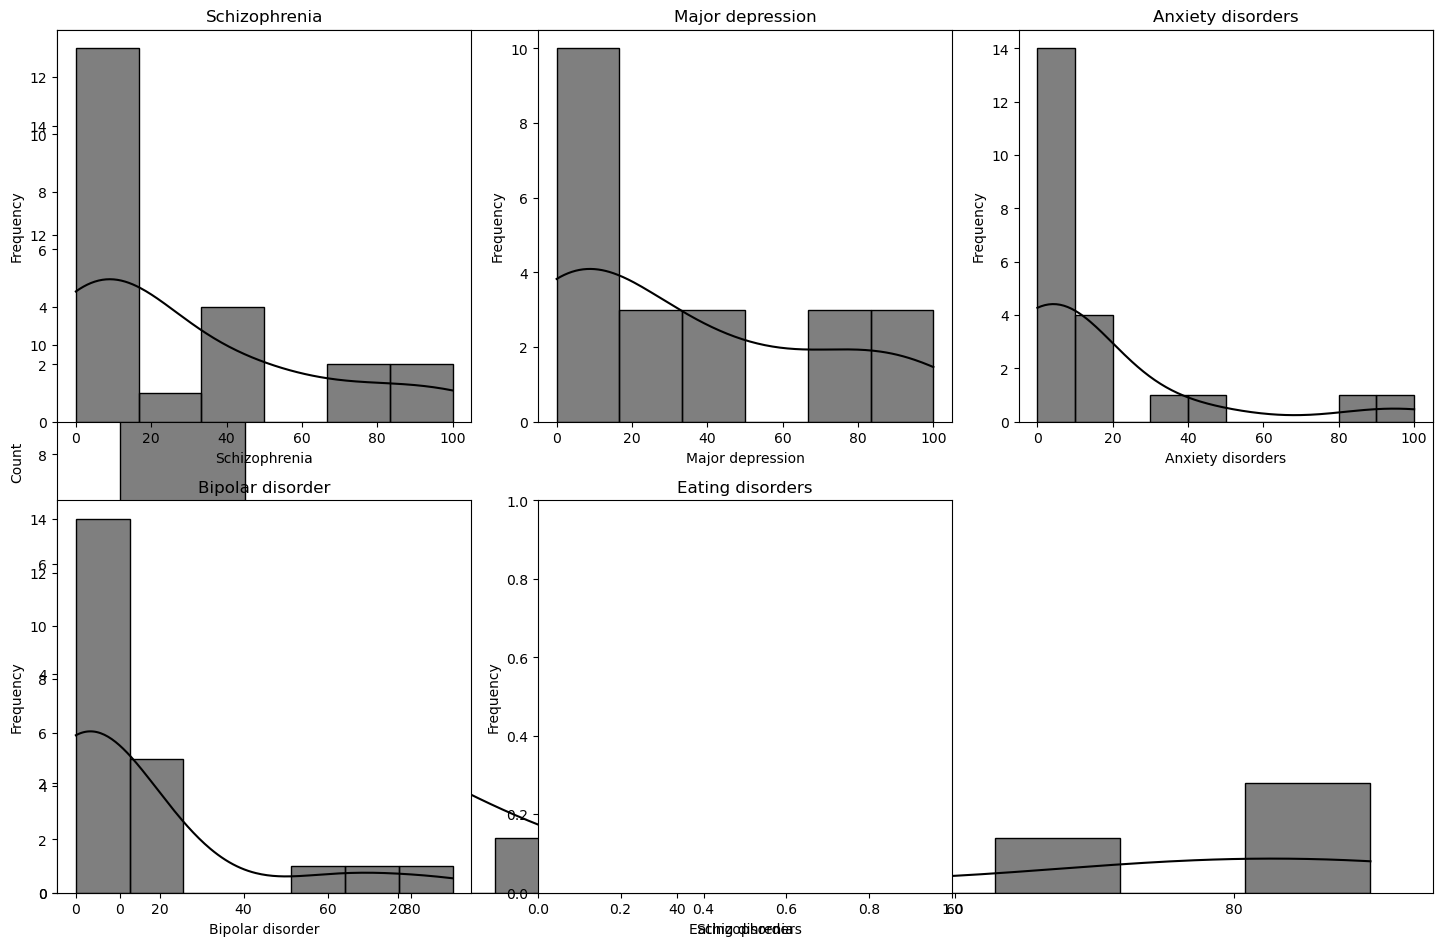

In [162]:
# Distribución de cada feature del dataframe anterior-> gráficos de distribución para cada columna numérica
plt.figure(figsize=(15, 10)) # Establecer tamaño de la figura

# Columnas a visualizar
columns_to_plot = ["Schizophrenia", "Major depression", "Anxiety disorders", "Bipolar disorder", "Eating disorders"]

# Subplots para c/característica
for m, col in enumerate(columns_to_plot, 1):
    sns.histplot(df_selected[col], kde=True, color='black')
    plt.subplot(2, 3, m)
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

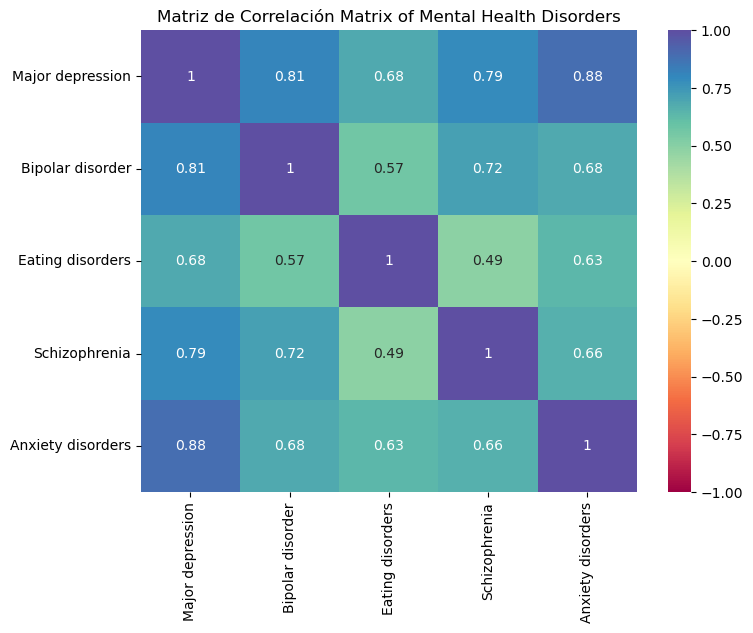

In [188]:
# Mostrar en un mapa de color la correlación entre las features ["Schizophrenia disorders", "Depressive disorders",
# "Anxiety disorders", "Bipolar disorders", "Eating disorders"]
col_data = ["Major depression", "Bipolar disorder", "Eating disorders", "Schizophrenia", "Anxiety disorders"] # Columnas para el análisis
df_new = df_illness[col_data].dropna() # Quitar los valores faltantes

# Calcular la correlación
corr_mat = df_new.corr()

# Grficar el Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.title('Matriz de Correlación Matrix of Mental Health Disorders')
plt.show()

In [190]:
# dataset cancer_reg visto en clase, determinar:
# la correlación entre las features [ 'target_deathrate', 'avganncount', 'avgdeathsperyear', 'incidencerate', 'medincome', 
# 'povertypercent', 'pctprivatecoverage', 'pctpubliccoverage' ]
arch = r"C:\Users\clau\Desktop\Repositorio\Datos cancer\cancer_reg.csv"
df = pd.read_csv(arch)
df.head() # Cargamos para ver como se ven las primeras filas

# la correlación entre las features: [ 'target_deathrate', 'avganncount', 'avgdeathsperyear', 'incidencerate', 'medincome', 
# 'povertypercent', 'pctprivatecoverage', 'pctpubliccoverage' ]

# Columnas relevantes para la correlación
columnas_sel = ['target_deathrate', 'avganncount', 'avgdeathsperyear','incidencerate', 'medincome', 'povertypercent','pctprivatecoverage', 'pctpubliccoverage']
matrix = df[columnas_sel].corr() # matriz de correlación
print(matrix)

                    target_deathrate  avganncount  avgdeathsperyear  \
target_deathrate            1.000000    -0.143532         -0.090715   
avganncount                -0.143532     1.000000          0.939408   
avgdeathsperyear           -0.090715     0.939408          1.000000   
incidencerate               0.449432     0.073553          0.062690   
medincome                  -0.428615     0.269145          0.223207   
povertypercent              0.429389    -0.135694         -0.066918   
pctprivatecoverage         -0.386066     0.132244          0.056183   
pctpubliccoverage           0.404572    -0.173548         -0.131687   

                    incidencerate  medincome  povertypercent  \
target_deathrate         0.449432  -0.428615        0.429389   
avganncount              0.073553   0.269145       -0.135694   
avgdeathsperyear         0.062690   0.223207       -0.066918   
incidencerate            1.000000  -0.001036        0.009046   
medincome               -0.001036   1.00

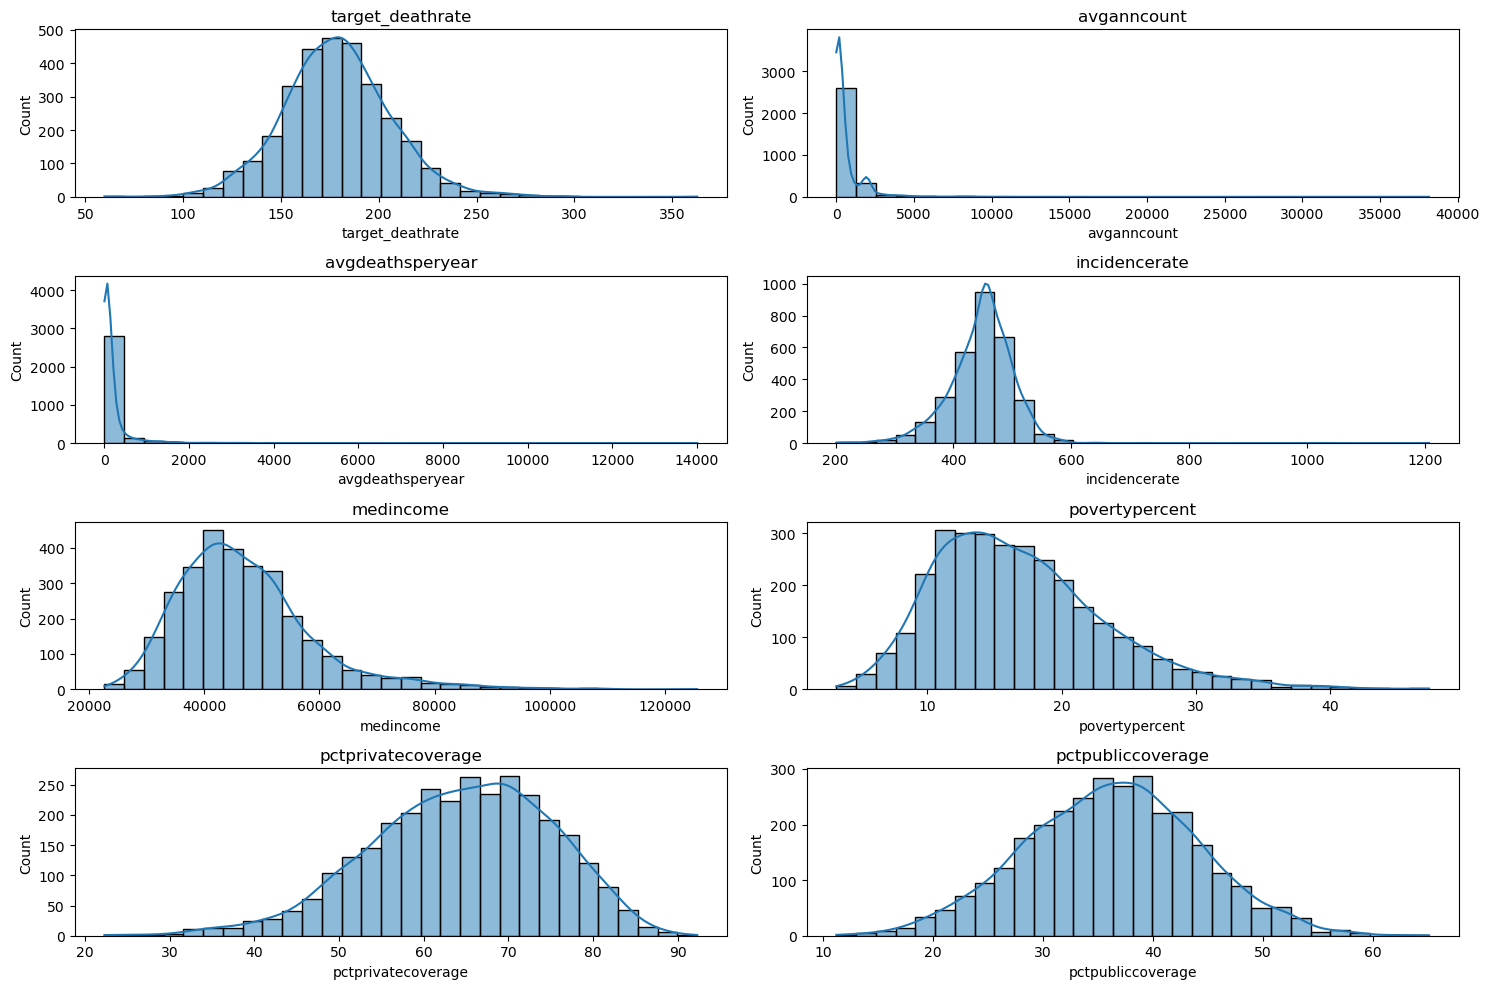

In [199]:
# Mostrar la distribución de cada feature del dataframe anterior
plt.figure(figsize=(15, 10))

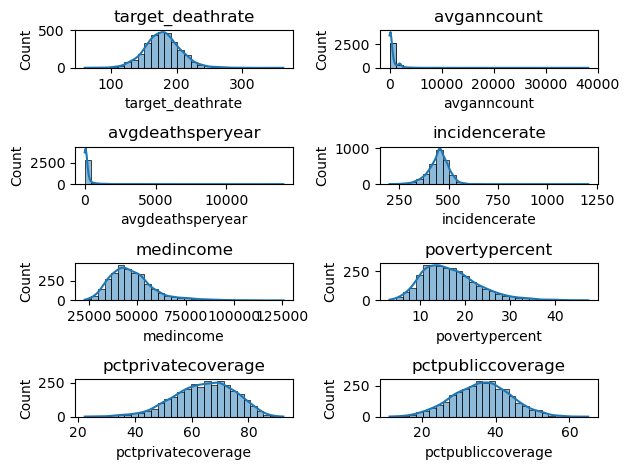

In [201]:
# Distribución
for i, column in enumerate(columnas_sel, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'{column}')
    plt.tight_layout()
plt.show()

In [207]:
!pip install scipy

In [209]:
# Aquellos que dependencia lineal encontrar los valores de la recta. hint: scipy
from scipy.stats import linregress
threshold = 0.7 # Definir umbral para considerar una relación lineal fuerte

# Encontrar las parejas de variables con correlación fuerte
corr_alta = [(col1, col2) for col1 in columnas_sel for col2 in columnas_sel 
                   if col1 != col2 and abs(matrix.loc[col1, col2]) > threshold]

# Recta de regresión para cada par de variables altamente correlacionadas
for col1, col2 in corr_alta:
    slope, intercept, r_value, p_value, std_err = linregress(df[col1], df[col2])
    print(f"Linear regression between {col1} and {col2}:")
    print(f"Slope: {slope}, Intercept: {intercept}, R-squared: {r_value**2}\n")

Linear regression between avganncount and avgdeathsperyear:
Slope: 0.3343704531082567, Intercept: -16.77582555446378, R-squared: 0.8824869833250746

Linear regression between avgdeathsperyear and avganncount:
Slope: 2.63924929706441, Intercept: 115.52825720840724, R-squared: 0.8824869833250746

Linear regression between medincome and povertypercent:
Slope: -0.00041997579928535573, Intercept: 36.64361469428117, R-squared: 0.622466147897743

Linear regression between medincome and pctprivatecoverage:
Slope: 0.0006403880130530199, Intercept: 34.216177690191394, R-squared: 0.5244290951379645

Linear regression between medincome and pctpubliccoverage:
Slope: -0.0004916172734453178, Intercept: 59.3897642781412, R-squared: 0.5697558764467693

Linear regression between povertypercent and medincome:
Slope: -1482.147659357876, Intercept: 72079.22986410403, R-squared: 0.622466147897743

Linear regression between povertypercent and pctprivatecoverage:
Slope: -1.366430104982124, Intercept: 87.41778